# Cell Programming
Cell Programming is a library for automated particle picking of low-resolution macromolecules using Data Programming. Follow the installation instructions in README.md.

First, let's set the path of EdgeBox to get the region proposals in our cell images. 

In [8]:
import os
import sys

#Add edge_boxes_with_python-master to the system path so that python can find the package
sys.path.append('/home/thomas/edge_boxes_with_python-master/')

In [9]:
#From edge_boxes_with_python script
import tempfile
import subprocess
import shlex
import os
import numpy as np
import scipy.io

imageDirectory = '/home/thomas/cellProgrammer/Images/'
currentWorkingDirectory = '/home/thomas/edge_boxes_with_python-master'

np.set_printoptions(threshold='nan')

def get_windows(image_fnames, cmd='edge_boxes_wrapper'):
    """
    Run MATLAB EdgeBoxes code on the given image filenames to
    generate window proposals.

    Parameters
    ----------
    image_filenames: strings
        Paths to images to run on.
    cmd: string
        edge boxes function to call:
            - 'edge_boxes_wrapper' for effective detection proposals paper configuration.
    """
    # Form the MATLAB script command that processes images and write to
    # temporary results file.
    f, output_filename = tempfile.mkstemp(suffix='.mat')
    os.close(f)
    fnames_cell = '{' + ','.join("'{}'".format(x) for x in image_fnames) + '}'
    command = "{}({}, '{}')".format(cmd, fnames_cell, output_filename)

    # Execute command in MATLAB.
    mc = "matlab -nojvm -r \"try; {}; catch; exit; end; exit\"".format(command)
    pid = subprocess.Popen(
        shlex.split(mc), stdout=open('/dev/null', 'w'), cwd=currentWorkingDirectory)
    retcode = pid.wait()
    print(mc)
    if retcode != 0:
        raise Exception("Matlab script did not exit successfully!")

    # Read the results and undo Matlab's 1-based indexing.
    all_boxes = list(scipy.io.loadmat(output_filename)['all_boxes'][0])
    subtractor = np.array((1, 1, 0, 0, 0))[np.newaxis, :]
    all_boxes = [boxes - subtractor for boxes in all_boxes]

    # Remove temporary file, and return.
    os.remove(output_filename)
    if len(all_boxes) != len(image_fnames):
        raise Exception("Something went wrong computing the windows!")
    
    #print(all_boxes[0])
    return all_boxes

In [10]:
import time

image_filenames = [
    imageDirectory + '1.jpg',
]

t = time.time()
boxes = get_windows(image_filenames)
print(boxes)
print("EdgeBoxes processed {} images in {:.3f} s".format(
    len(image_filenames), time.time() - t))

matlab -nojvm -r "try; edge_boxes_wrapper({'/home/thomas/cellProgrammer/Images/1.jpg'}, '/tmp/tmp0bwYpB.mat'); catch; exit; end; exit"
[array([[  3.12000000e+02,   1.84000000e+02,   3.16000000e+02,
          1.88000000e+02,   3.05906534e-01],
       [  3.72000000e+02,   5.40000000e+01,   3.87000000e+02,
          6.90000000e+01,   1.87107995e-01],
       [  2.38000000e+02,   1.96000000e+02,   5.12000000e+02,
          5.12000000e+02,   1.69807374e-01],
       [  4.38000000e+02,   4.11000000e+02,   4.53000000e+02,
          4.26000000e+02,   1.68203458e-01],
       [  2.16000000e+02,   2.56000000e+02,   2.20000000e+02,
          2.60000000e+02,   1.63448706e-01],
       [  8.00000000e+00,   8.00000000e+00,   5.12000000e+02,
          5.12000000e+02,   1.60589933e-01],
       [  3.52000000e+02,   1.24000000e+02,   3.71000000e+02,
          1.43000000e+02,   1.56970203e-01],
       [  2.35000000e+02,   1.76000000e+02,   4.69000000e+02,
          4.72000000e+02,   1.55256167e-01],
       [

We can see that the "object score" goes down as a function of array index location.

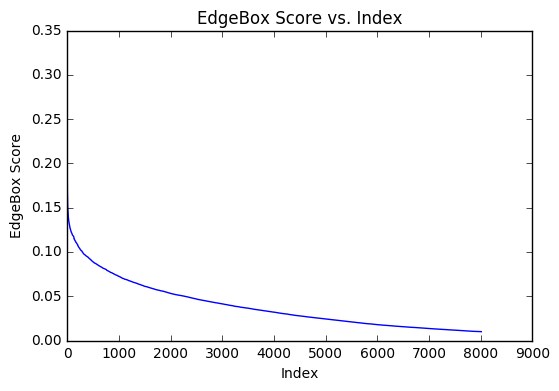

In [11]:
import matplotlib.pyplot as plt

plt.plot(boxes[0][:,4])
plt.xlabel('Index')
plt.ylabel('EdgeBox Score')
plt.title('EdgeBox Score vs. Index')
plt.show()

Let's take a look at the first few extracted cells.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


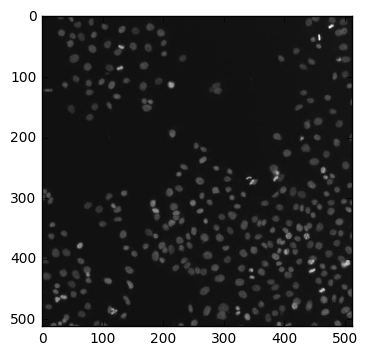

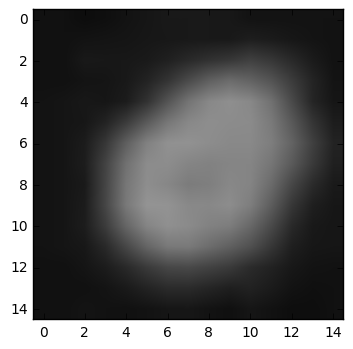

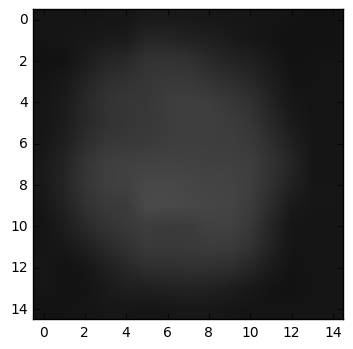

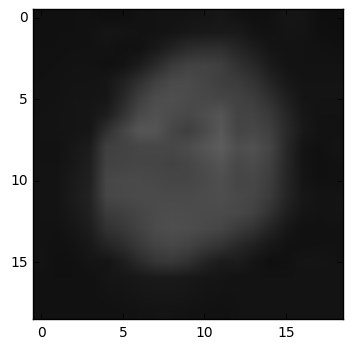

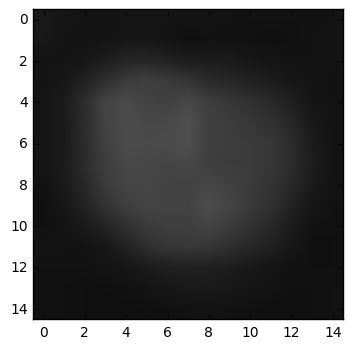

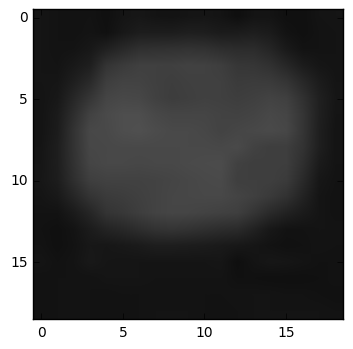

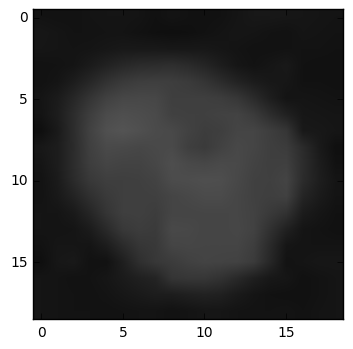

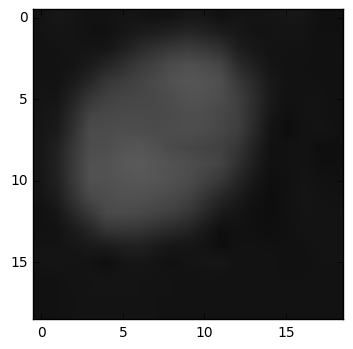

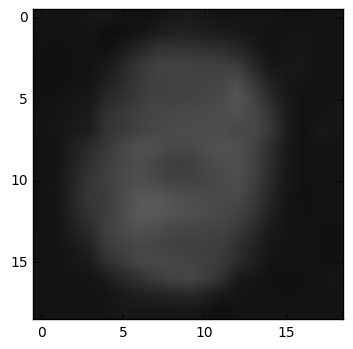

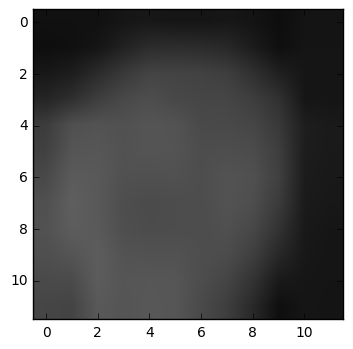

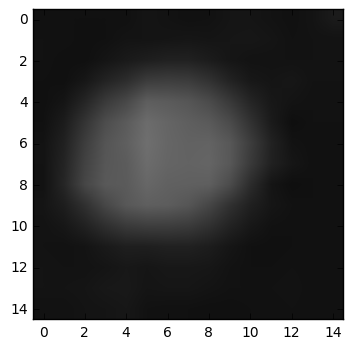

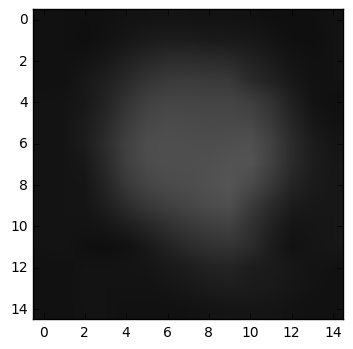

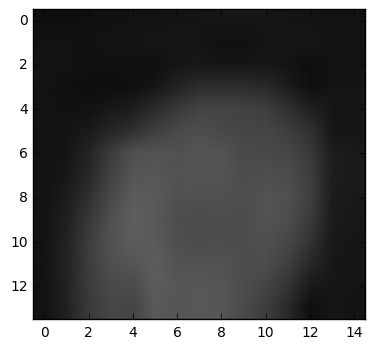

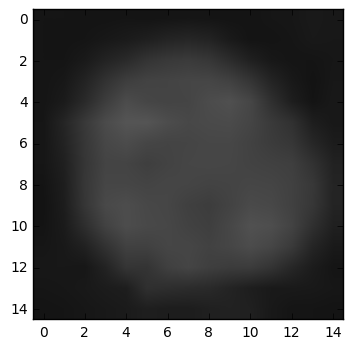

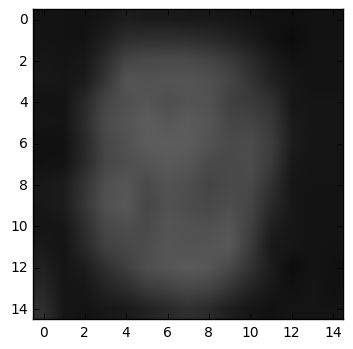

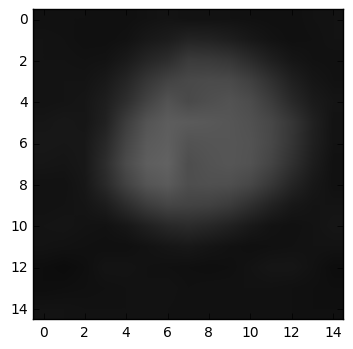

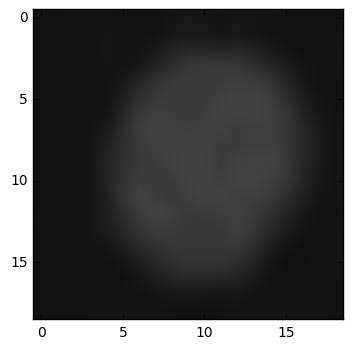

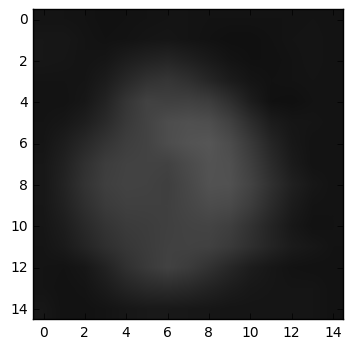

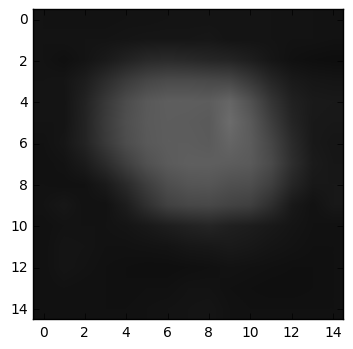

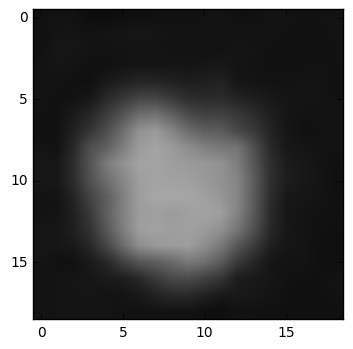

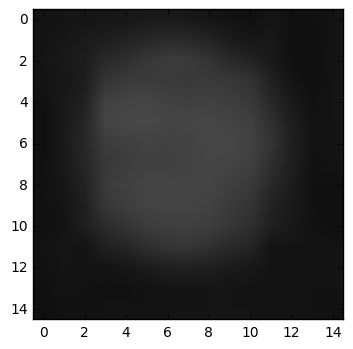

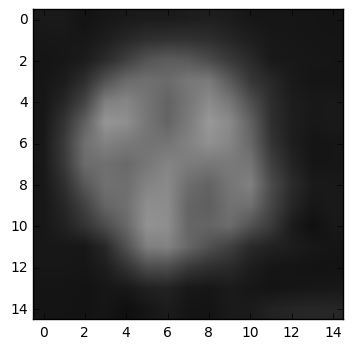

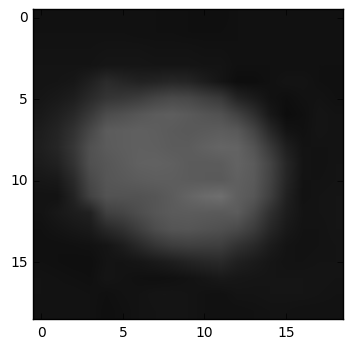

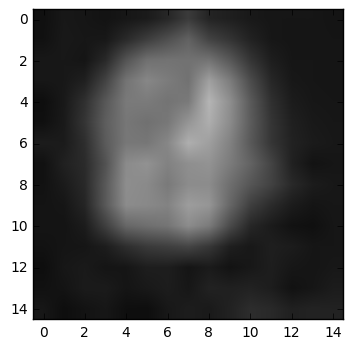

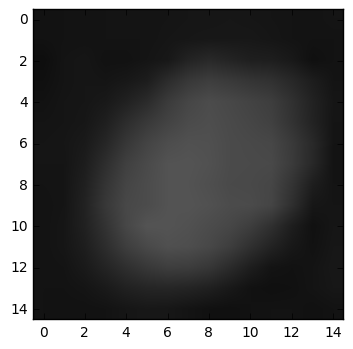

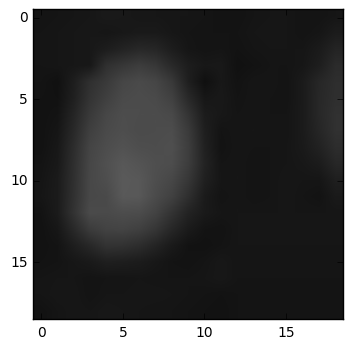

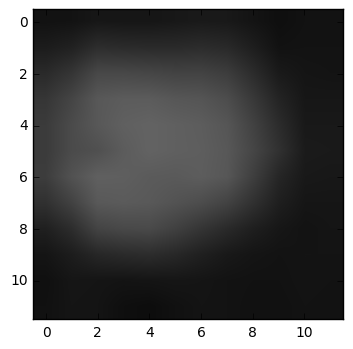

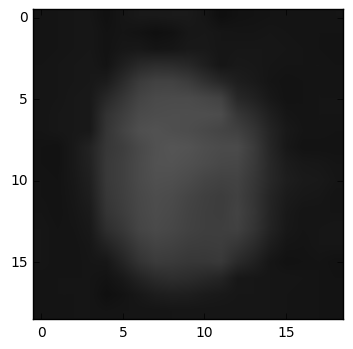

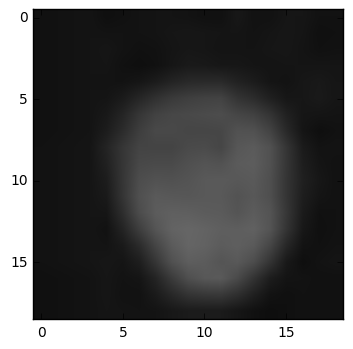

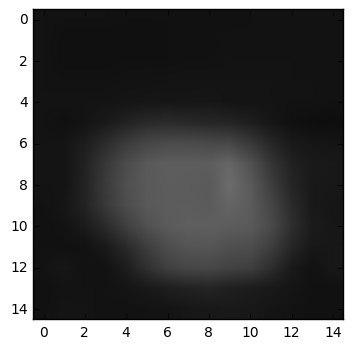

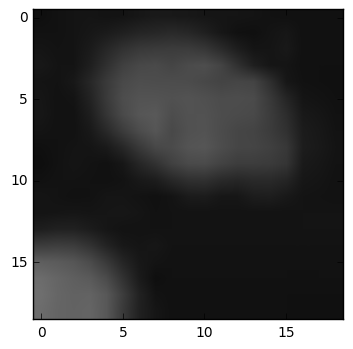

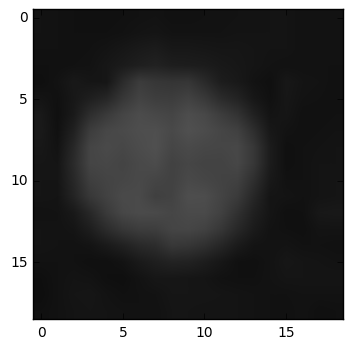

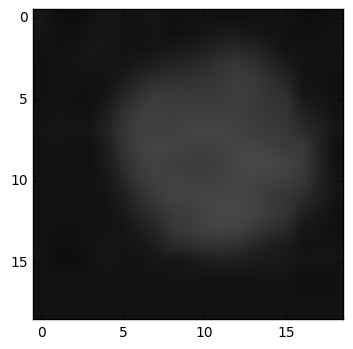

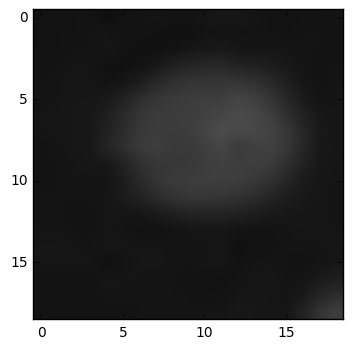

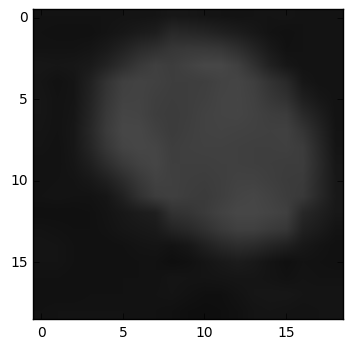

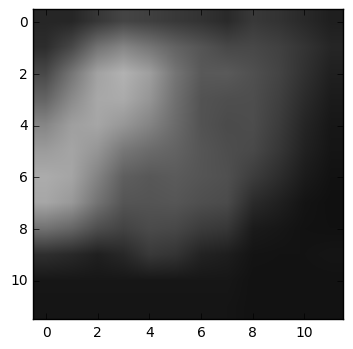

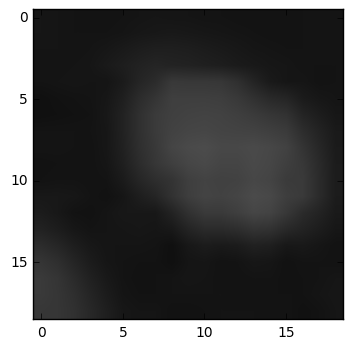

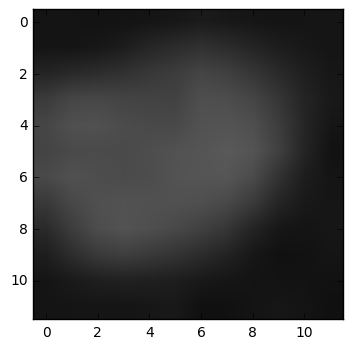

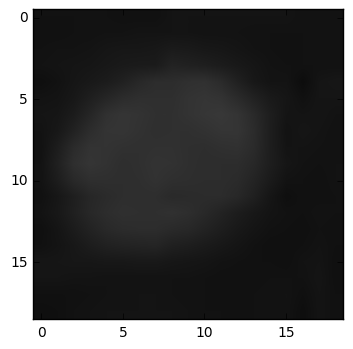

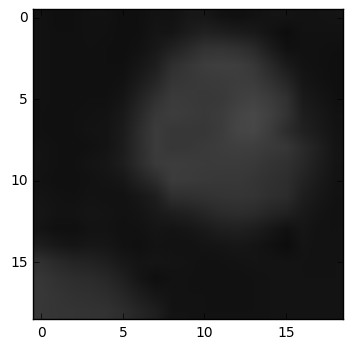

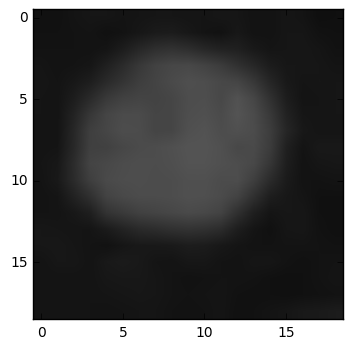

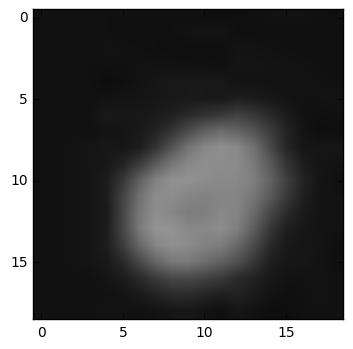

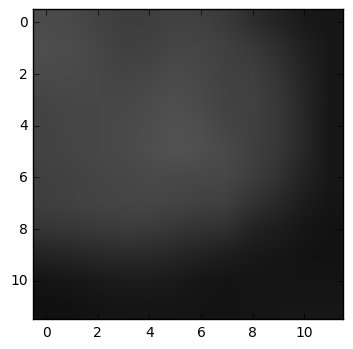

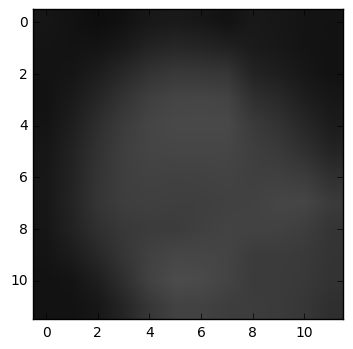

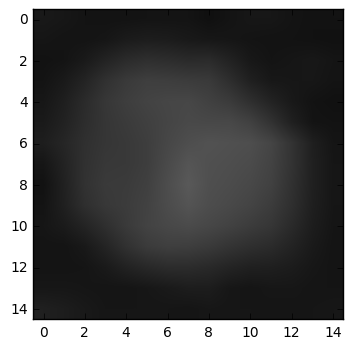

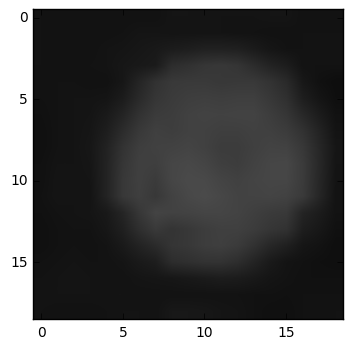

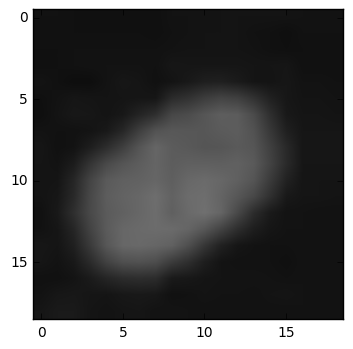

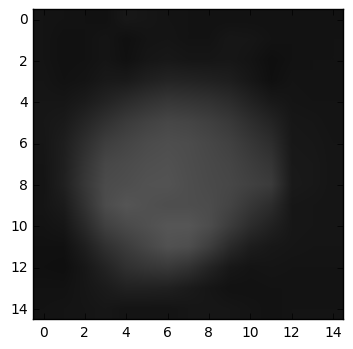

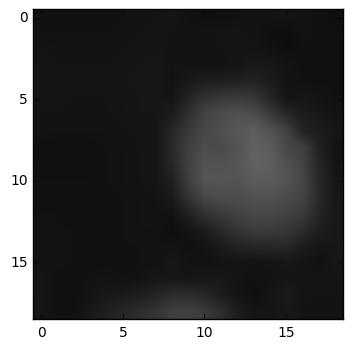

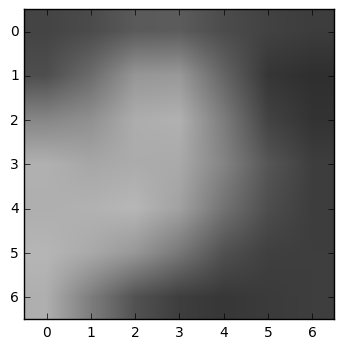

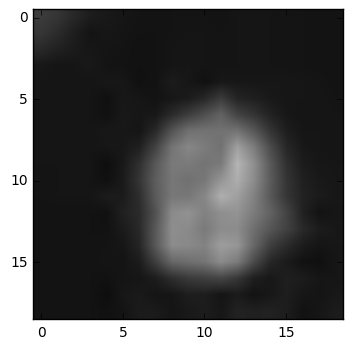

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline

image = np.asarray(Image.open(imageDirectory + '1.jpg', 'r'))
plt.imshow(image)
plt.figure()

for i in range(0,500):
    boxCord = boxes[0][i]
    xDelta = boxCord[2] - boxCord[0]
    yDelta = boxCord[3] - boxCord[1]
    if(xDelta * yDelta <= 20 * 20 and xDelta * yDelta >= 5 * 5):
        extractedBox = image[boxCord[0]:boxCord[2], boxCord[1]:boxCord[3]]
        plt.imshow(extractedBox)
        plt.figure()

It looks like our program so far is doing a good job. Let's try it out on fly cells.

In [13]:
image_filenames = [
    imageDirectory + '1.jpg',
]

t = time.time()
boxes = get_windows(image_filenames)
print(boxes)
print("EdgeBoxes processed {} images in {:.3f} s".format(
    len(image_filenames), time.time() - t))

matlab -nojvm -r "try; edge_boxes_wrapper({'/home/thomas/cellProgrammer/Images/1.jpg'}, '/tmp/tmppu8CUY.mat'); catch; exit; end; exit"
[array([[  3.12000000e+02,   1.84000000e+02,   3.16000000e+02,
          1.88000000e+02,   3.05906534e-01],
       [  3.72000000e+02,   5.40000000e+01,   3.87000000e+02,
          6.90000000e+01,   1.87107995e-01],
       [  2.38000000e+02,   1.96000000e+02,   5.12000000e+02,
          5.12000000e+02,   1.69807374e-01],
       [  4.38000000e+02,   4.11000000e+02,   4.53000000e+02,
          4.26000000e+02,   1.68203458e-01],
       [  2.16000000e+02,   2.56000000e+02,   2.20000000e+02,
          2.60000000e+02,   1.63448706e-01],
       [  8.00000000e+00,   8.00000000e+00,   5.12000000e+02,
          5.12000000e+02,   1.60589933e-01],
       [  3.52000000e+02,   1.24000000e+02,   3.71000000e+02,
          1.43000000e+02,   1.56970203e-01],
       [  2.35000000e+02,   1.76000000e+02,   4.69000000e+02,
          4.72000000e+02,   1.55256167e-01],
       [

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


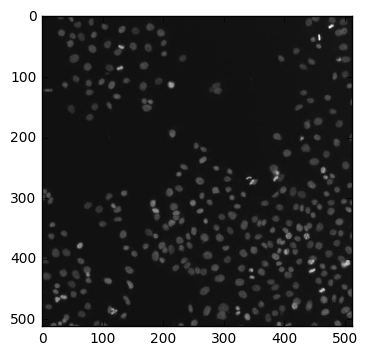

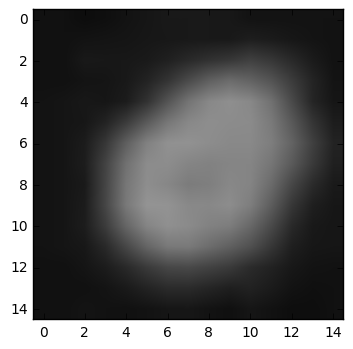

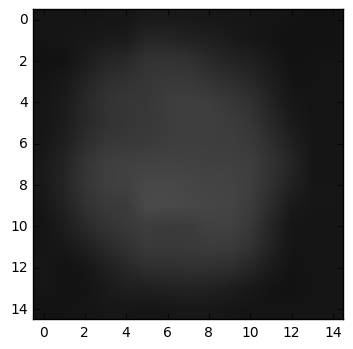

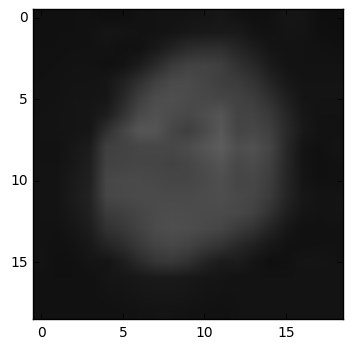

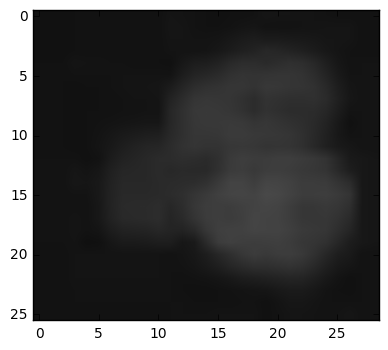

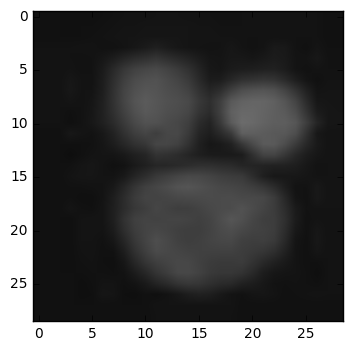

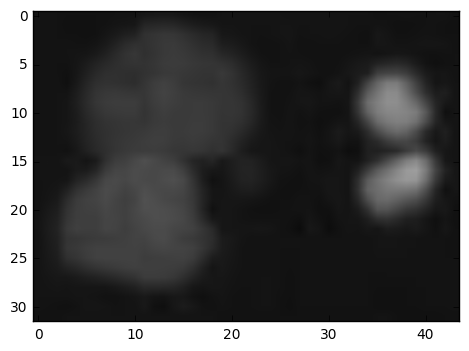

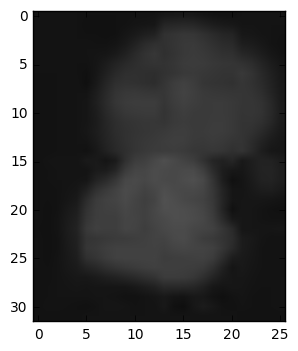

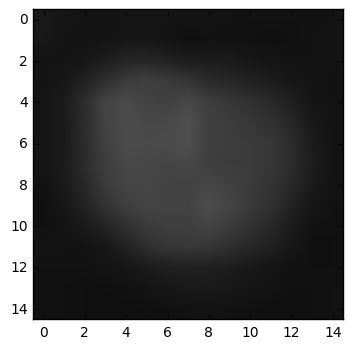

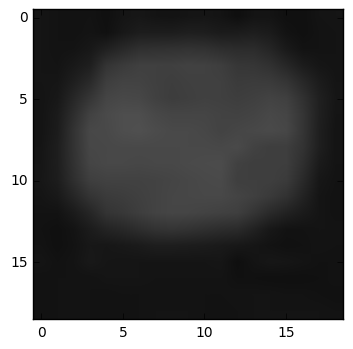

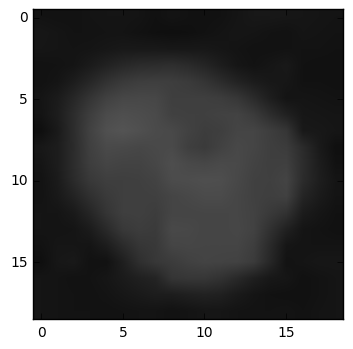

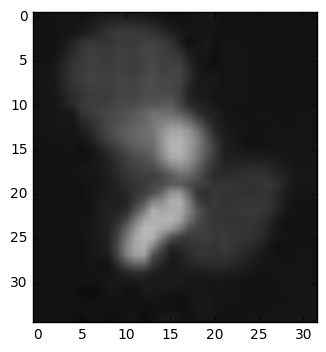

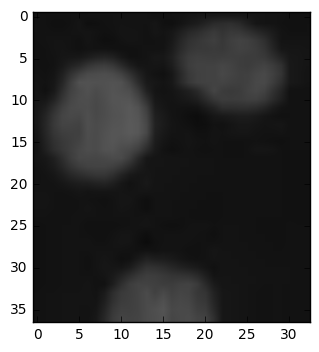

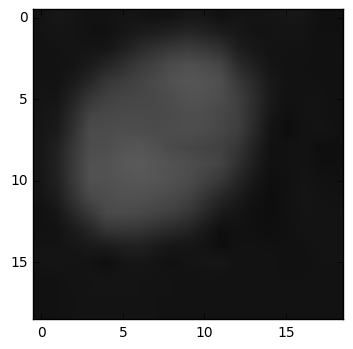

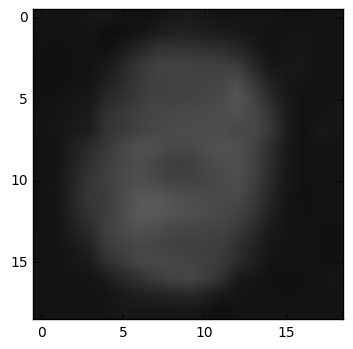

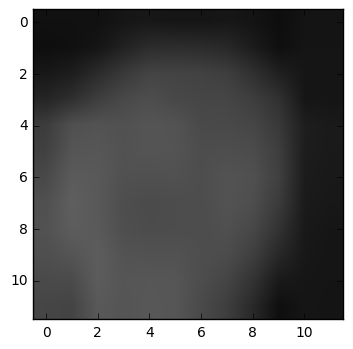

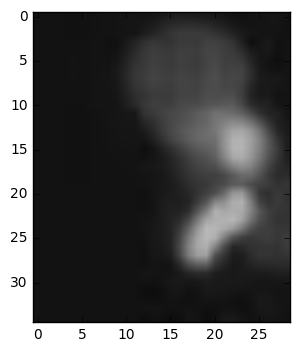

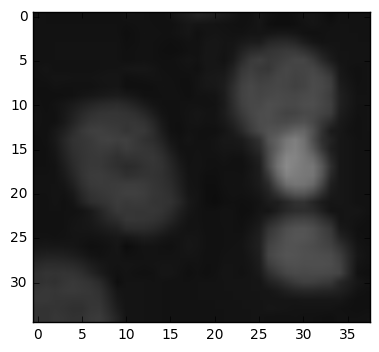

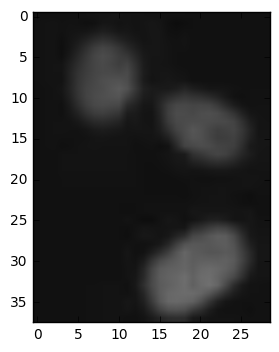

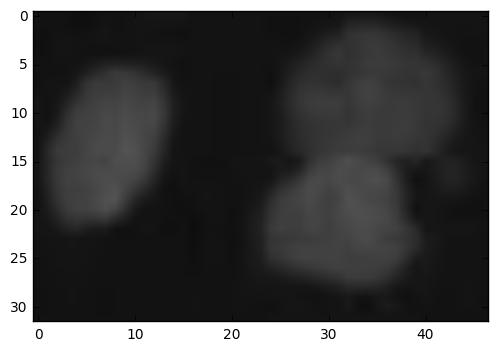

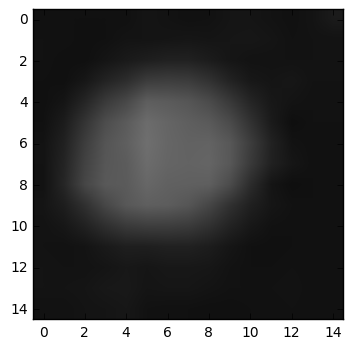

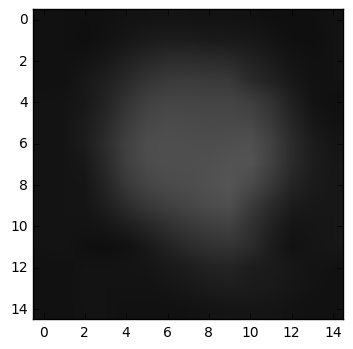

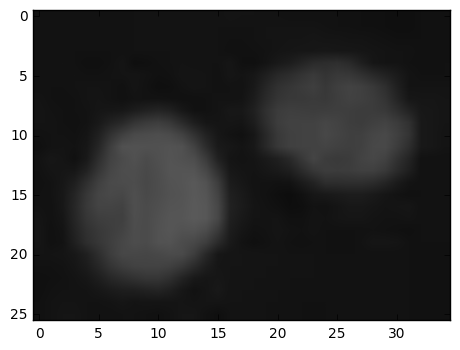

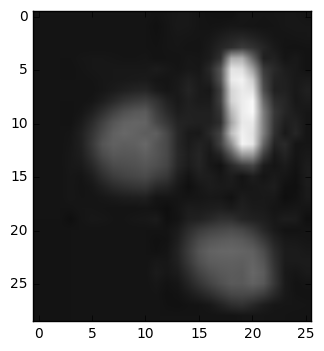

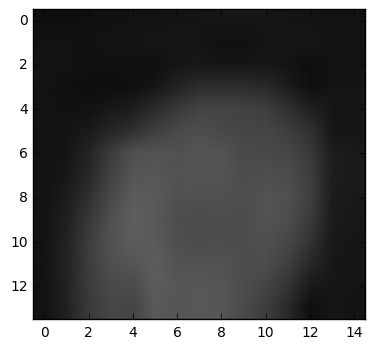

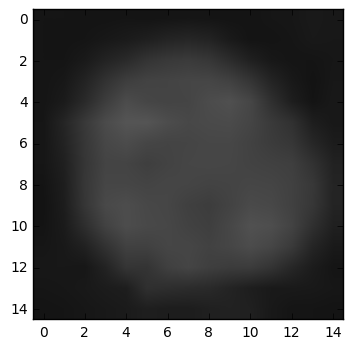

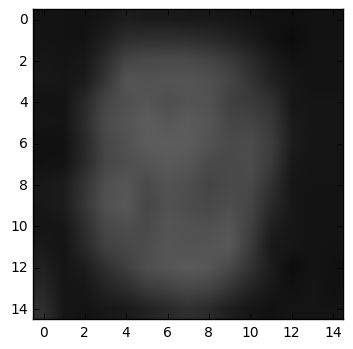

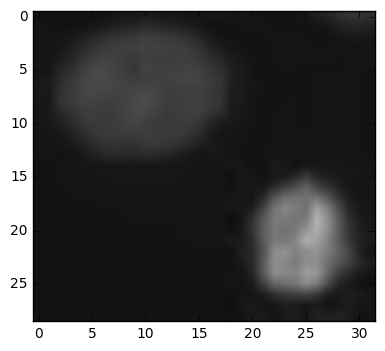

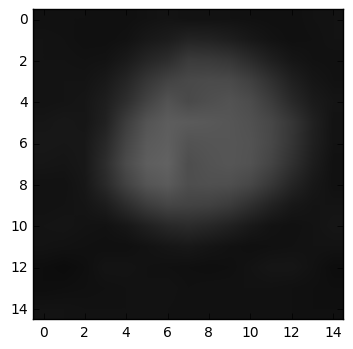

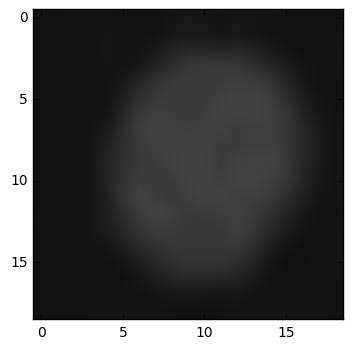

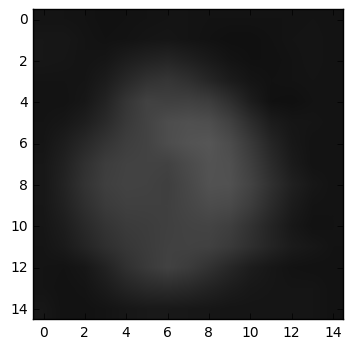

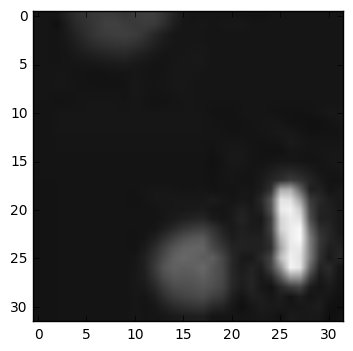

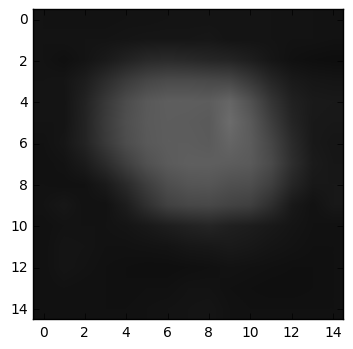

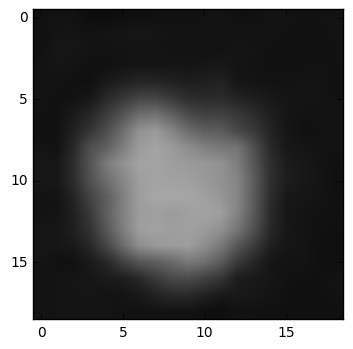

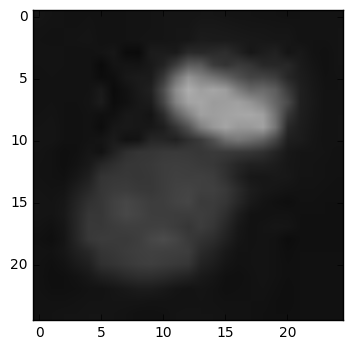

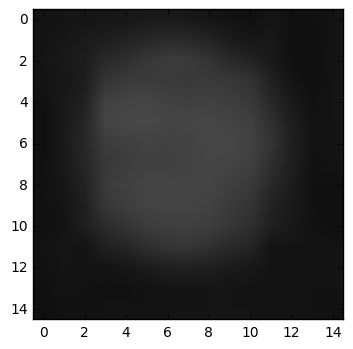

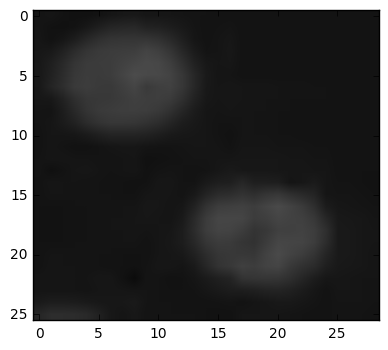

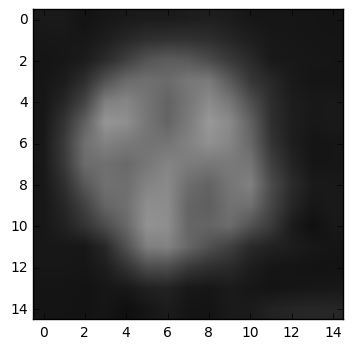

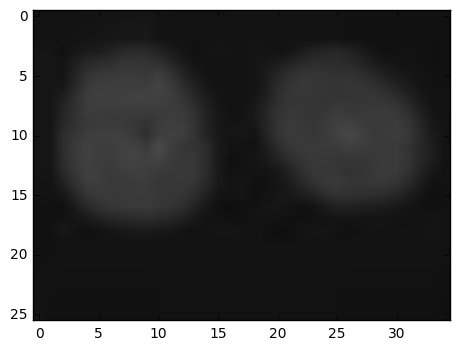

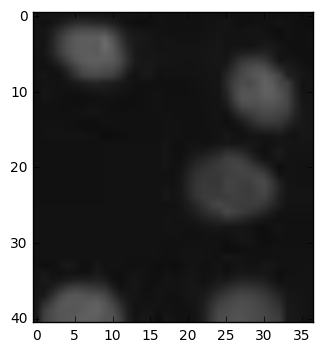

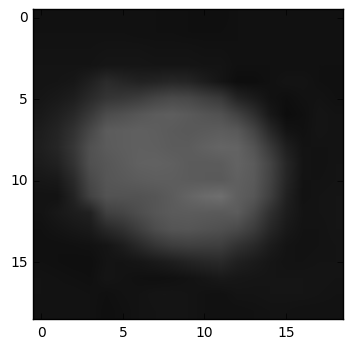

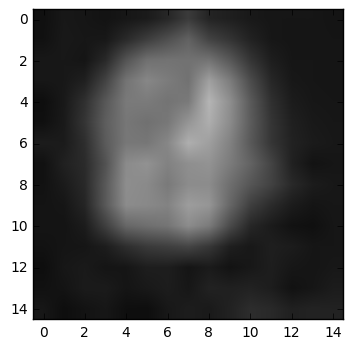

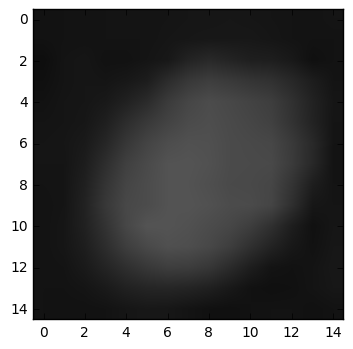

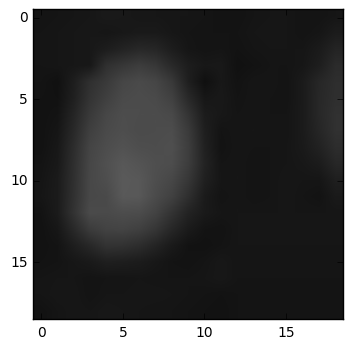

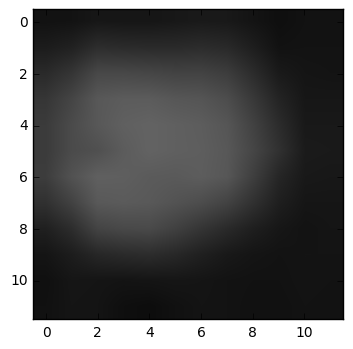

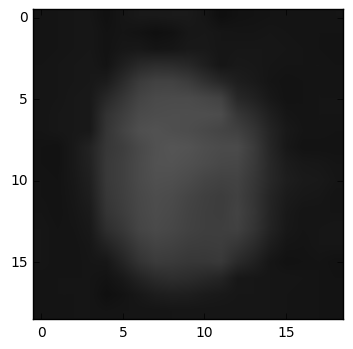

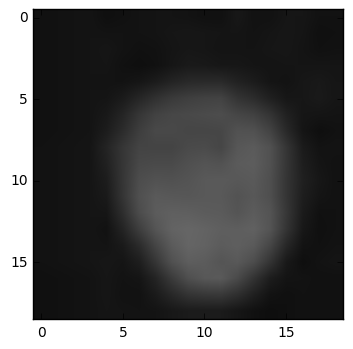

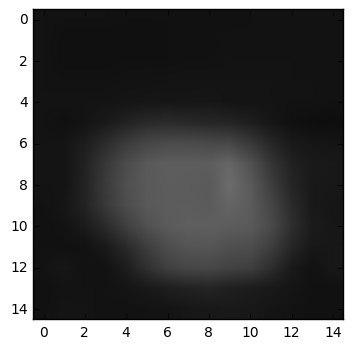

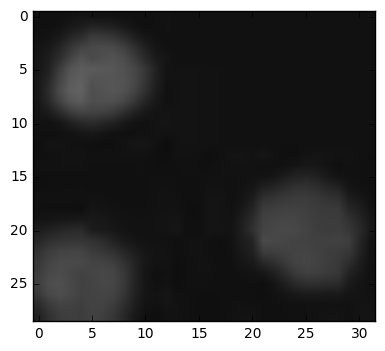

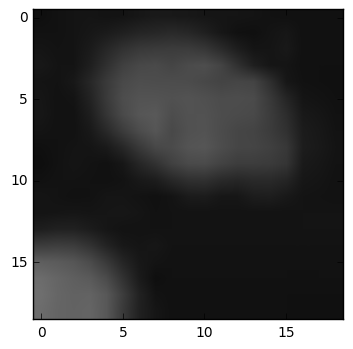

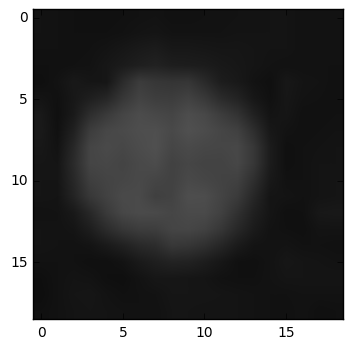

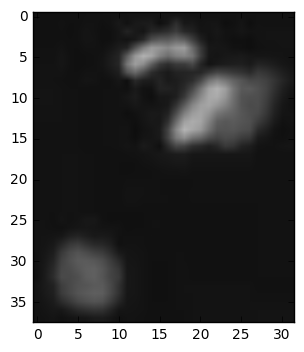

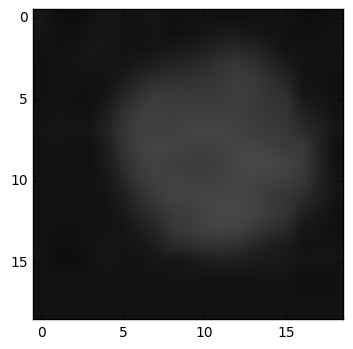

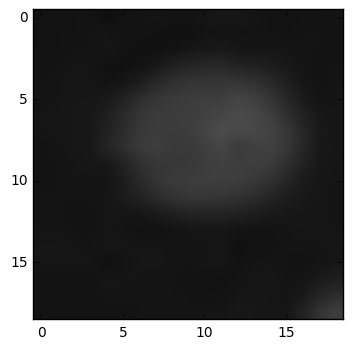

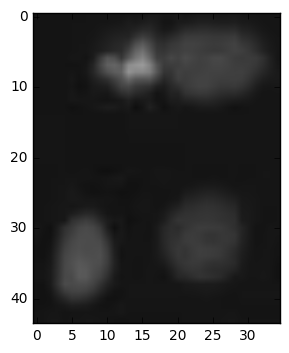

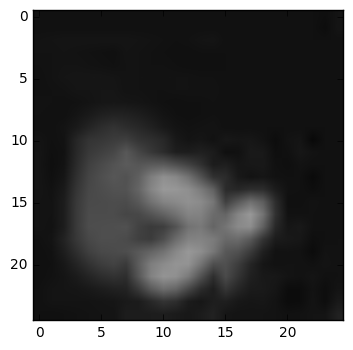

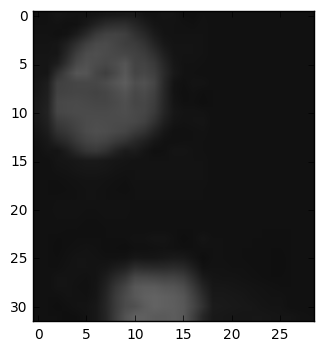

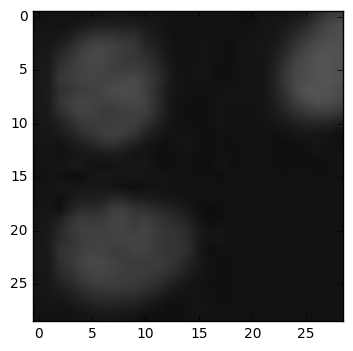

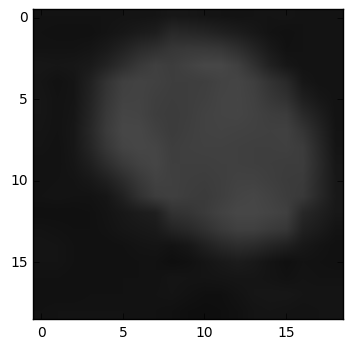

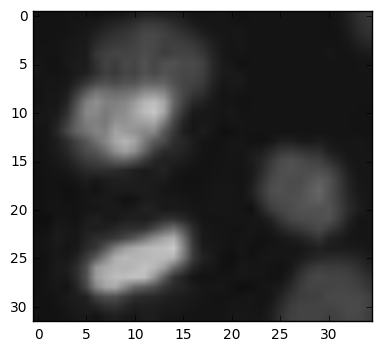

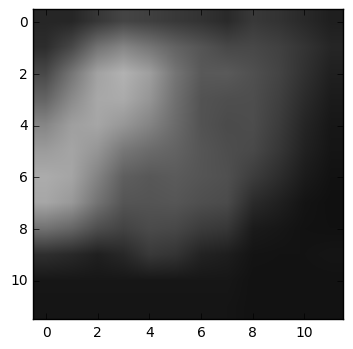

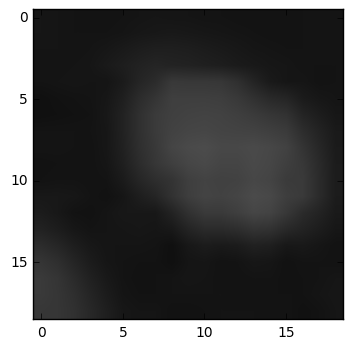

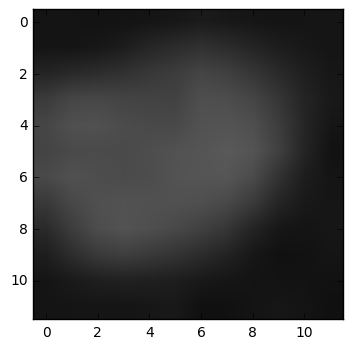

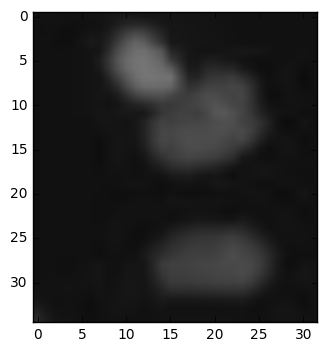

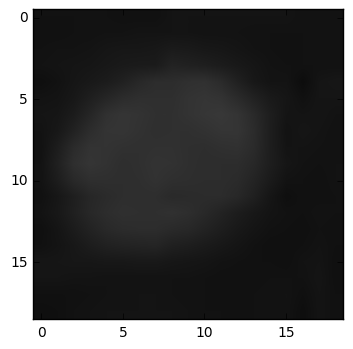

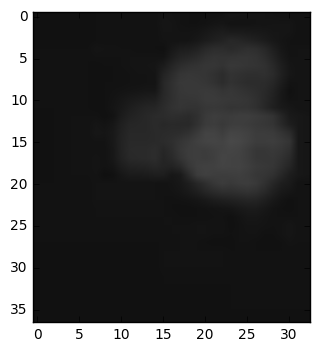

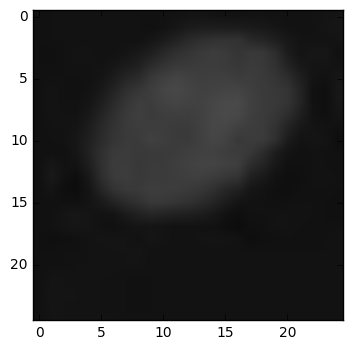

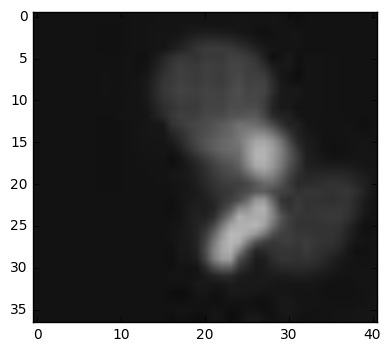

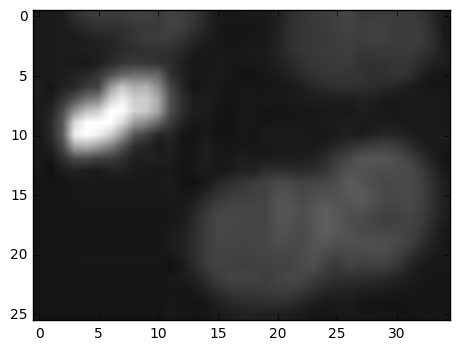

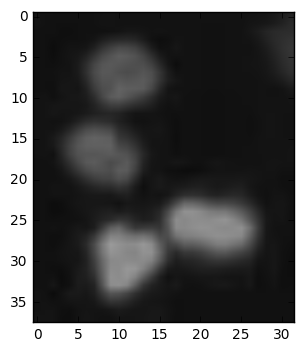

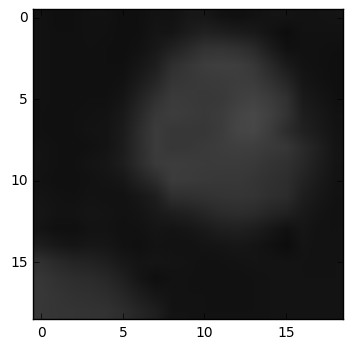

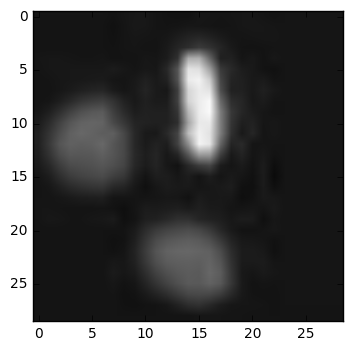

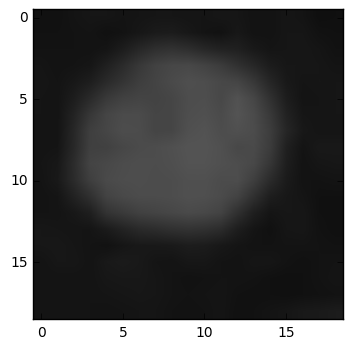

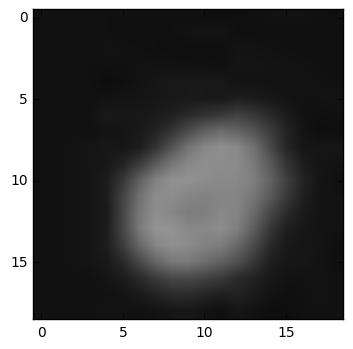

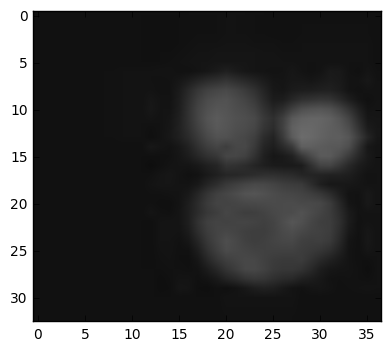

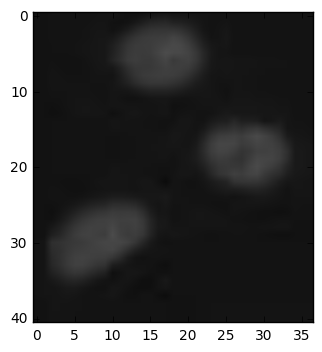

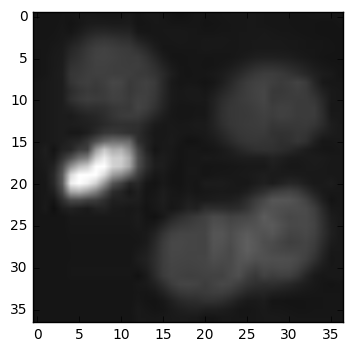

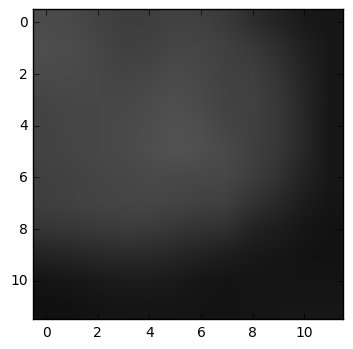

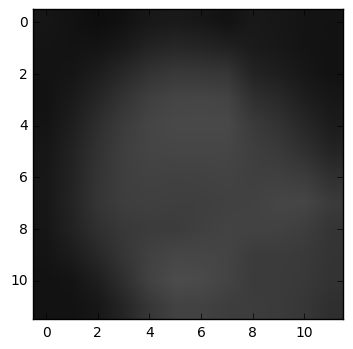

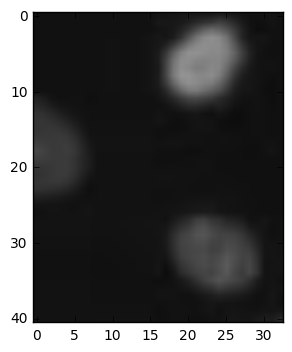

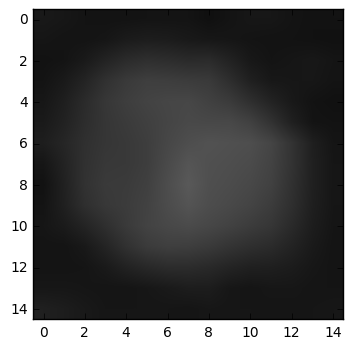

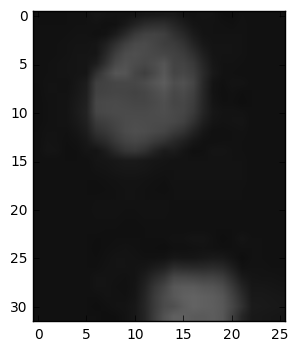

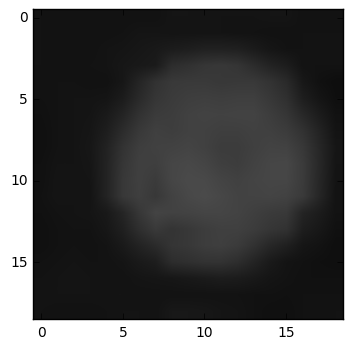

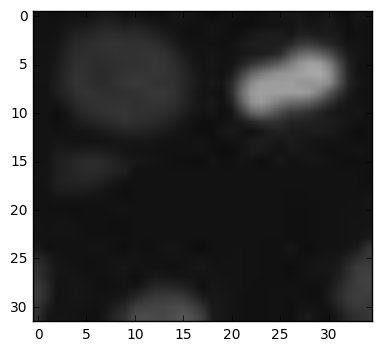

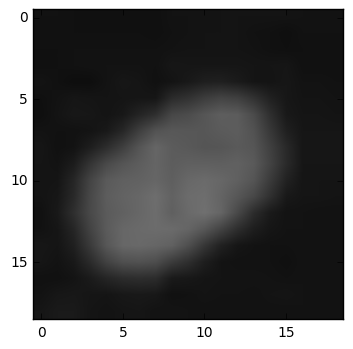

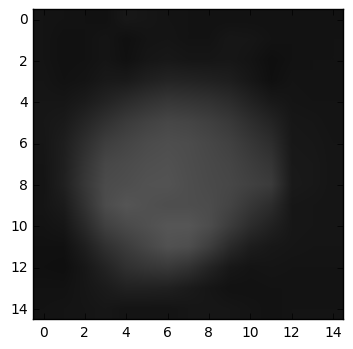

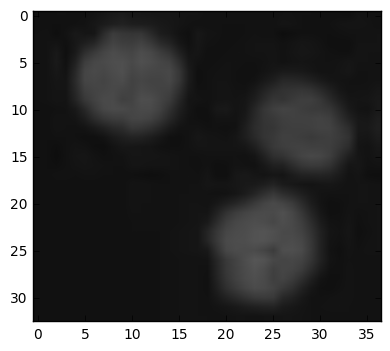

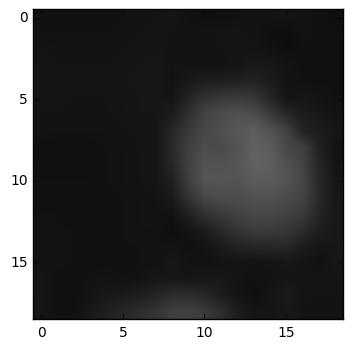

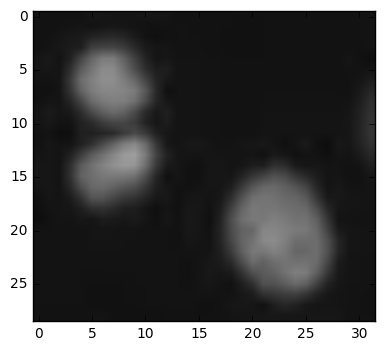

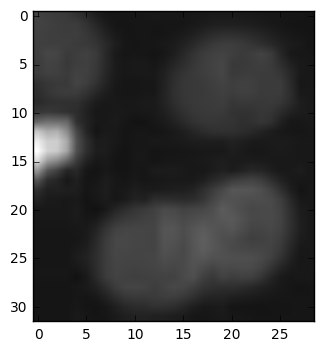

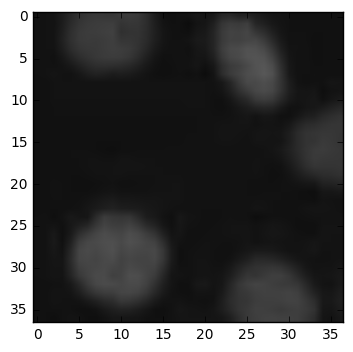

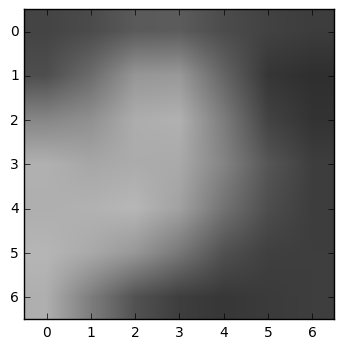

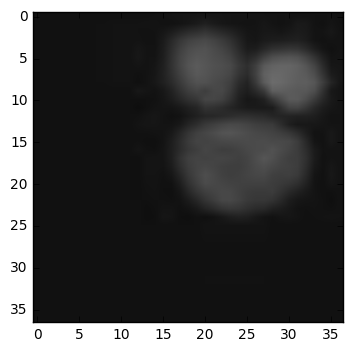

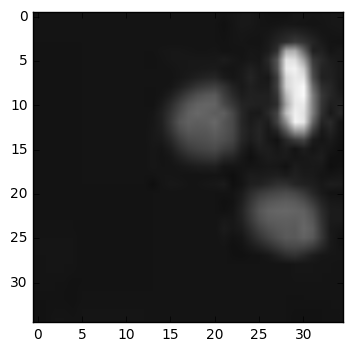

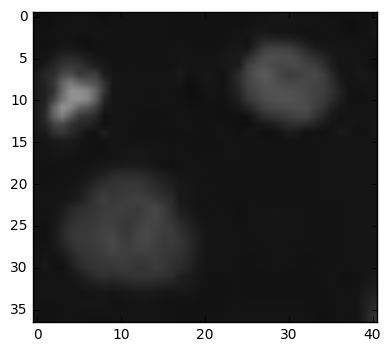

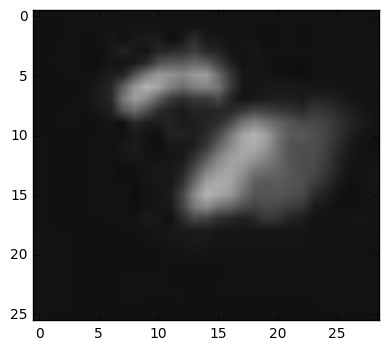

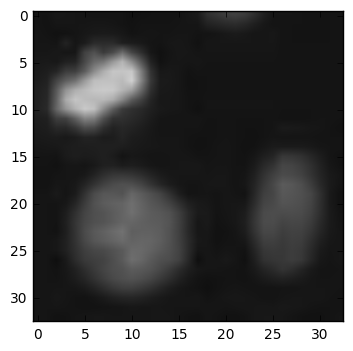

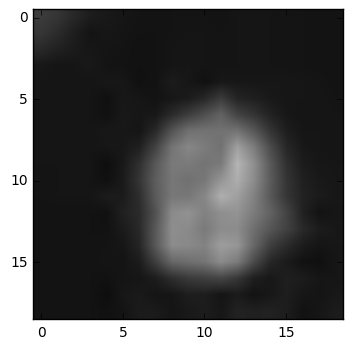

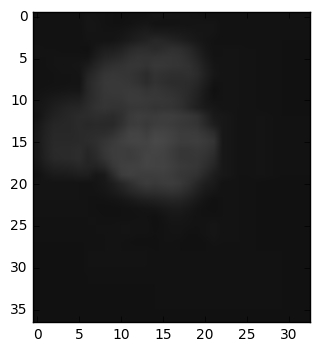

In [14]:
image = np.asarray(Image.open(imageDirectory + '1.jpg', 'r'))
plt.imshow(image)
plt.figure()

extractedBox = []

for i in range(0,500):
    boxCord = boxes[0][i]
    xDelta = boxCord[2] - boxCord[0]
    yDelta = boxCord[3] - boxCord[1]
    if(xDelta * yDelta <= 40 * 40 and xDelta * yDelta >= 5 * 5):
        extractedBox = image[boxCord[0]:boxCord[2], boxCord[1]:boxCord[3]]
        plt.imshow(extractedBox)
        plt.figure()

Let's extract some predictors for a given cell. We'll use the highest scoring cell from the 1st fly image.

[  3.72000000e+02   5.40000000e+01   3.87000000e+02   6.90000000e+01
   1.87107995e-01]
Average Pixel Intensity of our Cell:
57.08

Image Moments of our Contour:
{'mu02': 643.2847628330092, 'mu03': -55.38225994196546, 'm11': 4822.208333333333, 'nu02': 0.08799764205506092, 'm12': 39351.73333333333, 'mu21': 39.82261012251456, 'mu20': 566.6044509421718, 'nu20': 0.0775082180420877, 'm30': 56257.450000000004, 'nu21': 0.0005891344716629026, 'mu11': -145.3166829109805, 'mu12': 20.05673546909202, 'nu11': -0.019878483350224747, 'nu12': 0.00029671872882048065, 'm02': 5221.75, 'm03': 47570.8, 'm00': 85.5, 'm01': 625.6666666666666, 'mu30': -29.813367202579684, 'nu30': -0.0004410580391729186, 'nu03': -0.0008193234534358321, 'm10': 678.8333333333333, 'm20': 5956.25, 'm21': 41318.6}

Contour Enclosed Area:
85.5

Contour Perimeter:
35.5563489199


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


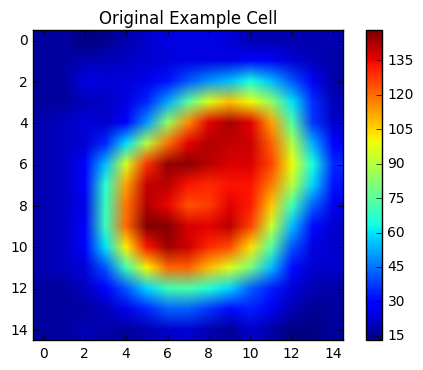

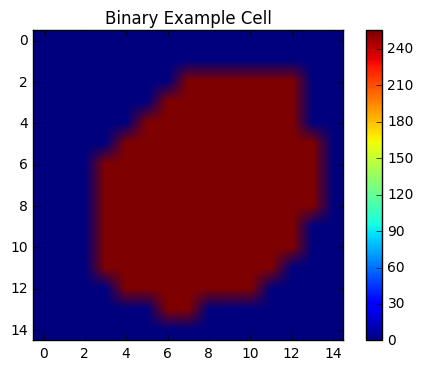

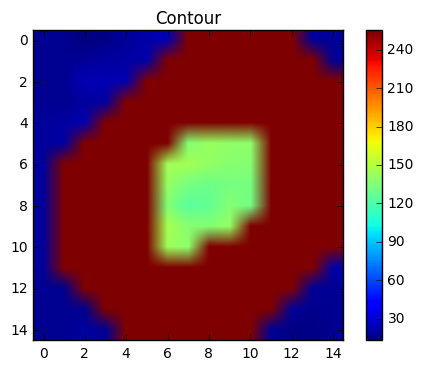

In [16]:
import cv2

im_gray = cv2.imread(imageDirectory + '1.jpg', 0)
boxCord = boxes[0][1]
print(boxCord)
extractedBoxOne = im_gray[boxCord[0]:boxCord[2], boxCord[1]:boxCord[3]]
val, thresh = cv2.threshold(extractedBoxOne,40,255,0)

plt.imshow(extractedBoxOne)
plt.title('Original Example Cell')
plt.colorbar()
plt.figure()

print('Average Pixel Intensity of our Cell:')
print(np.mean(extractedBoxOne))

plt.imshow(thresh)
plt.title('Binary Example Cell')
plt.colorbar()

im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
M = cv2.moments(cnt)

print('')
print('Image Moments of our Contour:')
print M

area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)

print('')
print('Contour Enclosed Area:')
print(area)

print('')
print('Contour Perimeter:')
print(perimeter)

plt.figure()
cv2.drawContours(extractedBoxOne, contours, -1, (255,0,0), 3)
plt.imshow(extractedBoxOne) #Note that the drawContours modifies the original image - we don't do this in the production code
plt.title('Contour')
plt.colorbar()

For each class, human and fly, we take all of the cell examples and insert a data row into our $X$ matrix. Our labels will be +1 for human and -1 for fly cell as per SVM notation. We'll use the SVM library from scikit-learn. We hold out 10% of our data for cross-validation purposes.

Now, putting it all together:

In [17]:
humanImages = ['1.jpg', '2.jpg']
flyImages = ['F1.jpg', 'F2.jpg']

In [18]:
import cv2

X1 = []
Y1 = []

MLabels = ['Average Pixel Intensity'] + M.keys()

for image in humanImages:
    
    image_filenames = [
    imageDirectory + image,
    ]

    t = time.time()
    boxes = get_windows(image_filenames)
    print("EdgeBoxes processed {} images in {:.3f} s".format(
        len(image_filenames), time.time() - t))

    im_gray = cv2.imread(imageDirectory + image, 0)
    
    #Go through our top 500 ranking cell proposals
    for i in range(0,500):
        
        boxCord = boxes[0][i]
        xDelta = boxCord[2] - boxCord[0]
        yDelta = boxCord[3] - boxCord[1]
        
        #Check if this proposal is of appropriate size
        if(xDelta * yDelta <= 40 * 40 and xDelta * yDelta >= 5 * 5):

            tempArray = []

            #Find the contour of our cell
            extractedBoxOne = im_gray[boxCord[0]:boxCord[2], boxCord[1]:boxCord[3]]
            val, thresh = cv2.threshold(extractedBoxOne,40,255,0)

            avgPixelIntensity = np.mean(extractedBoxOne)
            tempArray.append(avgPixelIntensity)

            #Find our image moments
            im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[0]
            M = cv2.moments(cnt)

            tempArray = np.hstack((tempArray, M.values()))

            perimeter = cv2.arcLength(cnt,True)

            tempArray = np.hstack((tempArray, tempArray))
            
            Y1.append(0)
            
            if X1 == []:
                X1 = tempArray
            else:
                X1 = np.vstack((X1, tempArray))

matlab -nojvm -r "try; edge_boxes_wrapper({'/home/thomas/cellProgrammer/Images/1.jpg'}, '/tmp/tmpKWqJRq.mat'); catch; exit; end; exit"
EdgeBoxes processed 1 images in 1.663 s


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:53: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


matlab -nojvm -r "try; edge_boxes_wrapper({'/home/thomas/cellProgrammer/Images/2.jpg'}, '/tmp/tmp27lzbA.mat'); catch; exit; end; exit"
EdgeBoxes processed 1 images in 1.570 s


In [21]:
import cv2

X2 = []
Y2 = []
MLabels = ['Average Pixel Intensity'] + M.keys()

for image in flyImages:
    
    image_filenames = [
    imageDirectory + image,
    ]

    t = time.time()
    boxes = get_windows(image_filenames)
    print("EdgeBoxes processed {} images in {:.3f} s".format(
        len(image_filenames), time.time() - t))

    im_gray = cv2.imread(imageDirectory + image, 0)
    
    #Go through our top 500 ranking cell proposals
    for i in range(0,500):
        
        boxCord = boxes[0][i]
        xDelta = boxCord[2] - boxCord[0]
        yDelta = boxCord[3] - boxCord[1]
        
        #Check if this proposal is of appropriate size
        if(xDelta * yDelta <= 40 * 40 and xDelta * yDelta >= 5 * 5 and i!= 132):

            tempArray = []

            #Find the contour of our cell
            extractedBoxOne = im_gray[boxCord[0]:boxCord[2], boxCord[1]:boxCord[3]]
            val, thresh = cv2.threshold(extractedBoxOne,40,255,0)

            avgPixelIntensity = np.mean(extractedBoxOne)
            tempArray.append(avgPixelIntensity)

            #Find our image moments
            im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[0]
            M = cv2.moments(cnt)

            tempArray = np.hstack((tempArray, M.values()))

            perimeter = cv2.arcLength(cnt,True)

            tempArray = np.hstack((tempArray, tempArray))
            
            Y2.append(1)
            
            if X2 == []:
                X2 = tempArray
            else:
                X2 = np.vstack((X2, tempArray))

matlab -nojvm -r "try; edge_boxes_wrapper({'/home/thomas/cellProgrammer/Images/F1.jpg'}, '/tmp/tmpzmKlm4.mat'); catch; exit; end; exit"
EdgeBoxes processed 1 images in 2.007 s


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:52: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


matlab -nojvm -r "try; edge_boxes_wrapper({'/home/thomas/cellProgrammer/Images/F2.jpg'}, '/tmp/tmpVhRoAw.mat'); catch; exit; end; exit"
EdgeBoxes processed 1 images in 2.299 s


In [23]:
X = np.vstack((X1, X2))
y = np.hstack((Y1, Y2))
y = y.flatten()

In [40]:
from sklearn import linear_model
import progressbar

bar = progressbar.ProgressBar(max_value=10000)
accuracyPercentage = []

for j in range(10000):
    indices = np.random.permutation(X.shape[0])
    training_idx, test_idx = indices[:700], indices[700:]

    XTrain = X[training_idx,:]
    yTrain = [y[i] for i in training_idx]

    XTest = X[test_idx,:]
    YTest = [y[i] for i in test_idx]

    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(XTrain, yTrain)

    counter = 0 #Number of times we get a test example correct
    
    for i in range(XTest.shape[0]):
        if logreg.predict(XTest[i].reshape(1,-1)) == YTest[i]:
            counter += 1
    accuracyPercentage.append(float(counter)/XTest.shape[0])
    
    bar.update(j)

 99% ( 9997 of 10000) |#################### | Elapsed Time: 0:04:13 ETA: 0:00:00

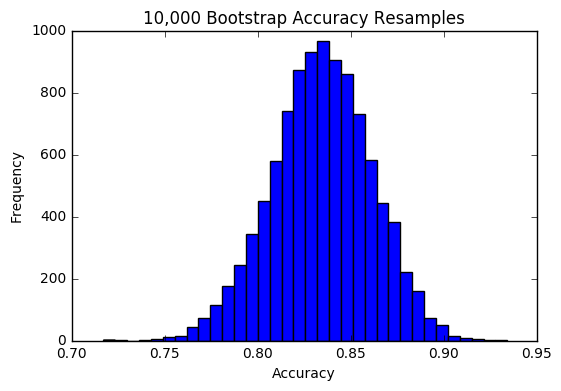

In [49]:
plt.hist(accuracyPercentage, bins=34)
plt.title('10,000 Bootstrap Accuracy Resamples')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')